In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from DataVisualization import DataVisualization
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import (
    RandomOverSampler,
    ADASYN,
    SMOTE,
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    NearMiss, 
    CondensedNearestNeighbour
)

# Fraud Detection In Vehicle Insurance:

## DataFrame:

In [2]:
path = r'../data/vehicle-insurance-claim.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=','
)

In [3]:
display(df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## Código:

In [4]:
class FraudDetection(DataVisualization):
    pass

if __name__ == '__main__':
    fraud_detection = FraudDetection()

## Output:

### Data Understanding:

In [5]:
display(df.tail(3))

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [6]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [7]:
fraud_detection.verificando_as_dimensões_do_dataframe(
    dataframe=df
)

Linhas: 15420 
Colunas: 33


In [8]:
fraud_detection.descrição(
    dataframe=df
)

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,0.06,7710.50,8.48,407.70,2.49,1994.87
std,1.29,1.26,13.49,0.24,4451.51,4.60,43.95,1.12,0.80
min,1.00,1.00,0.00,0.00,1.00,1.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,0.00,3855.75,5.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,0.00,7710.50,8.00,400.00,2.00,1995.00
75%,4.00,4.00,48.00,0.00,11565.25,12.00,400.00,3.00,1996.00
max,5.00,5.00,80.00,1.00,15420.00,16.00,700.00,4.00,1996.00


In [9]:
fraud_detection.verificando_tipos(
    dataframe=df
)

,Tipos
Month,object
WeekOfMonth,int64
DayOfWeek,object
Make,object
AccidentArea,object
DayOfWeekClaimed,object
MonthClaimed,object
WeekOfMonthClaimed,int64
Sex,object
MaritalStatus,object


In [10]:
fraud_detection.verificando_valores_nulos(
    dataframe=df
)

,Quantidade,Porcentagem
Month,0,0.00%
WeekOfMonth,0,0.00%
DayOfWeek,0,0.00%
Make,0,0.00%
AccidentArea,0,0.00%
DayOfWeekClaimed,0,0.00%
MonthClaimed,0,0.00%
WeekOfMonthClaimed,0,0.00%
Sex,0,0.00%
MaritalStatus,0,0.00%


In [11]:
fraud_detection.verificando_valores_duplicados(
    dataframe=df
)

,Quantidade,Porcentagem
Month,15408,99.92%
WeekOfMonth,15415,99.97%
DayOfWeek,15413,99.95%
Make,15401,99.88%
AccidentArea,15418,99.99%
DayOfWeekClaimed,15412,99.95%
MonthClaimed,15407,99.92%
WeekOfMonthClaimed,15415,99.97%
Sex,15418,99.99%
MaritalStatus,15416,99.97%


### Data Visualization:

Verificando a distribuição de clientes que cancelaram (Churn) e os que não cancelaram (não Churn):

<Axes: xlabel='FraudFound_P'>

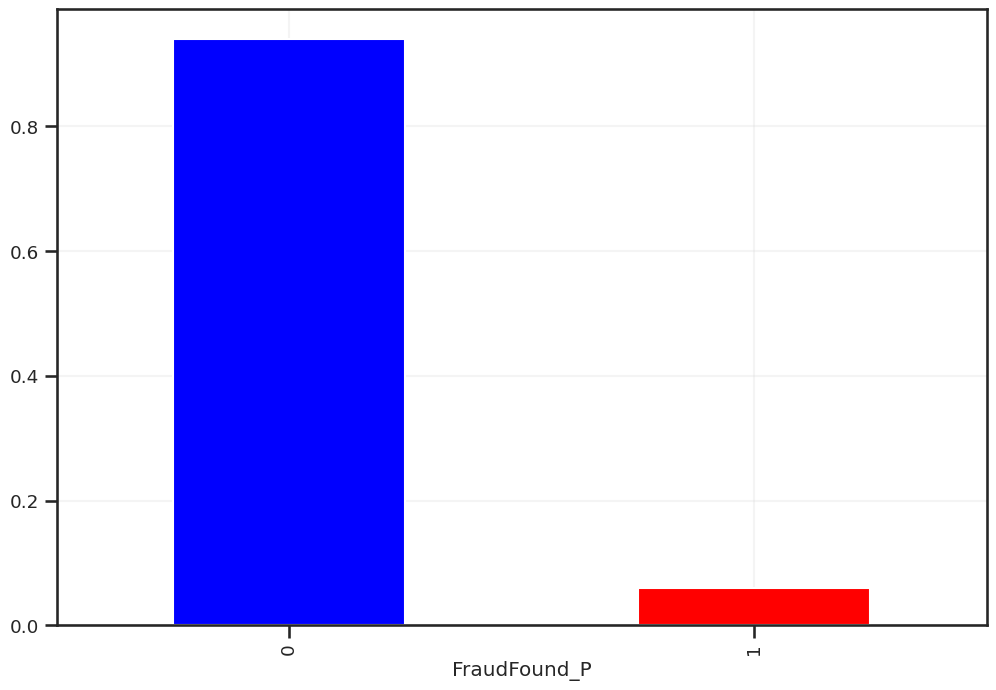

In [14]:
df['FraudFound_P'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'red'])

In [16]:
df['FraudFound_P'].value_counts(normalize=True) * 100

FraudFound_P
0    94.014267
1     5.985733
Name: proportion, dtype: float64

### Data Preparetion:

**Train-test split:**

In [19]:
x = df.drop(columns=['FraudFound_P', 'PolicyNumber'])
y = df['FraudFound_P']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=28,
    shuffle=True
)

**Construção do pipeline de pré-processamento:**

In [22]:
pre_processing = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), selector(dtype_include='object')),
        ('std', StandardScaler(), selector(dtype_include=['int64', 'float64']))
    ]
)